#Project built by Rohit Joshi 
#This projects aims to predict the quality of Red Wine on a scale of 1-10, based upon attributes like pH, Chloride concentration and Acidity
#Data set acquired from Kaggle
#importing all relevant packages and libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
reg= LinearRegression()

In [4]:
#assigning the data to the dataframe variable named 'wine_data'
wine_data=pd.read_csv("winequality-red.csv")

In [5]:
#
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#No Nan values, thus data is good to go

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

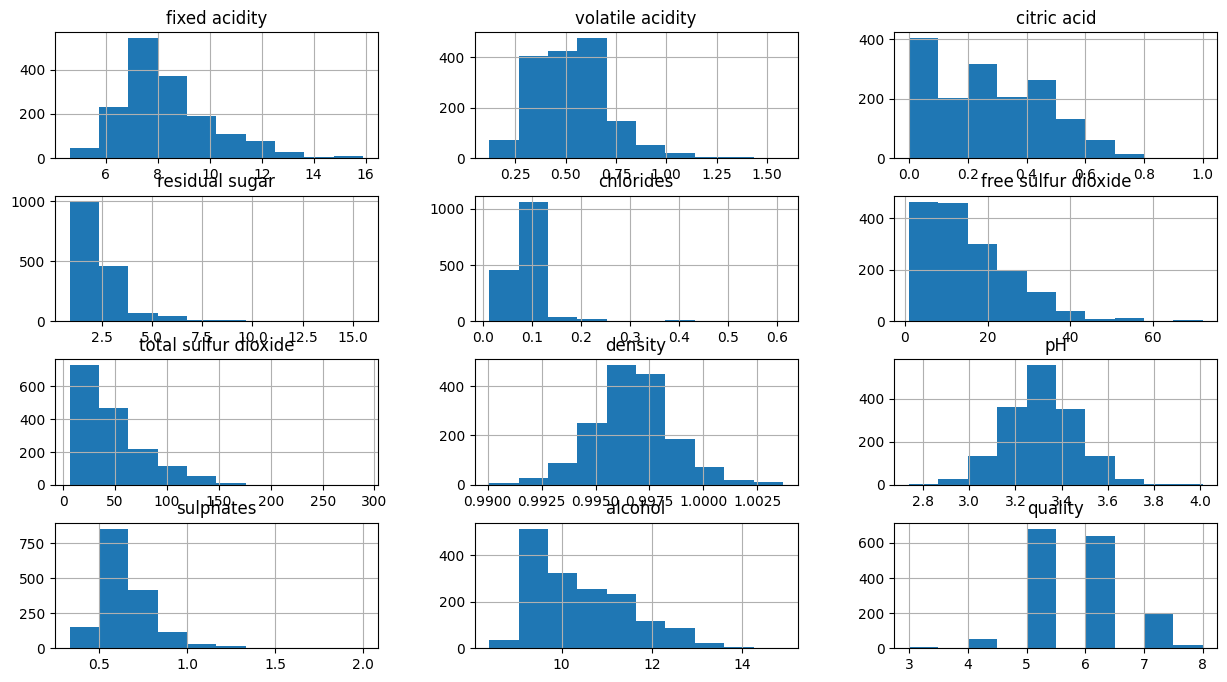

In [8]:
#Seaborn Histogram plot to visualize the data 
wine_data.hist(figsize=(15,8))

In [11]:
#Correlation amonngst the data 
wine_data.corr(numeric_only=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: xlabel='quality', ylabel='alcohol'>

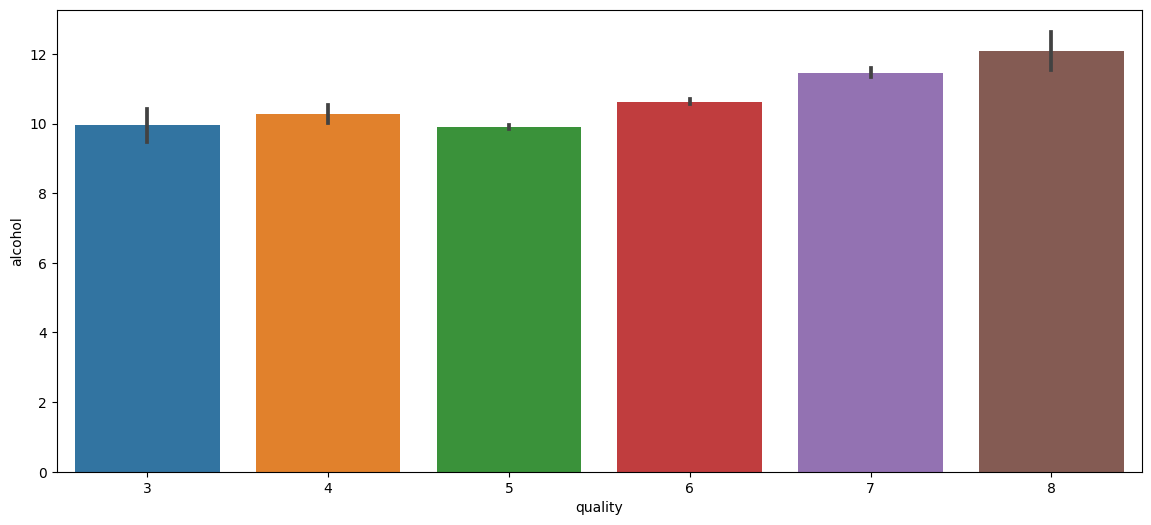

In [28]:
#PLotting the various  attribute of the data against the wine quality to determine which factor contributes the most to the quality
#Here we will also judge whether the variation of wine quality with the said factor follows a cognizble trend or not
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(x='quality', y='alcohol', data=wine_data)

In [ ]:
#No conspicous relation between the Alcohol content and the wine quality
#Wines with equal amount of alchoho do not neccesarily have the same quality

<Axes: xlabel='quality', ylabel='fixed acidity'>

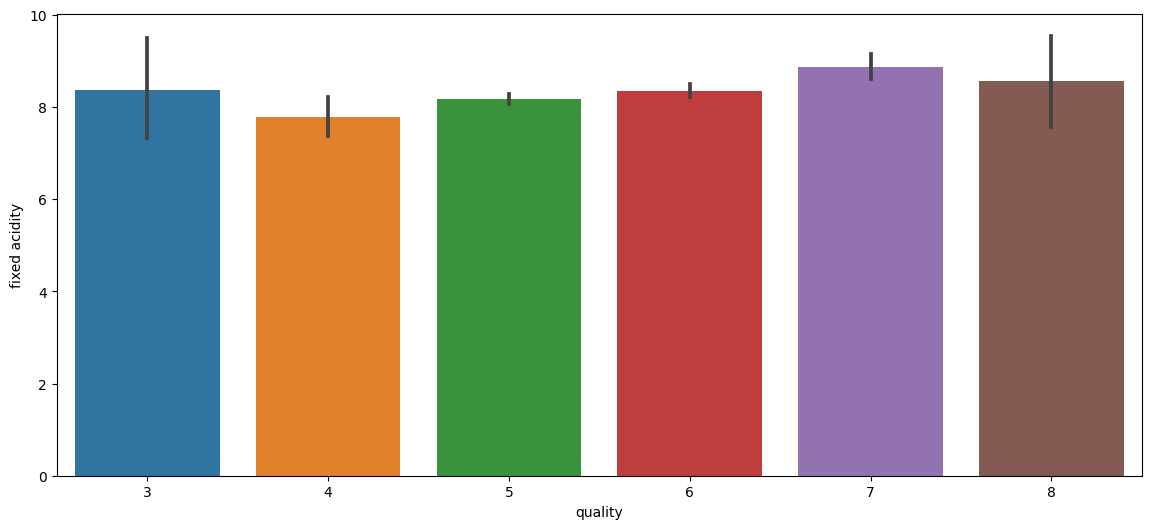

In [30]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(x='quality', y='fixed acidity', data=wine_data)

In [ ]:
#No conspicous relation between the Fixed acidity  and the wine quality

<Axes: xlabel='quality', ylabel='volatile acidity'>

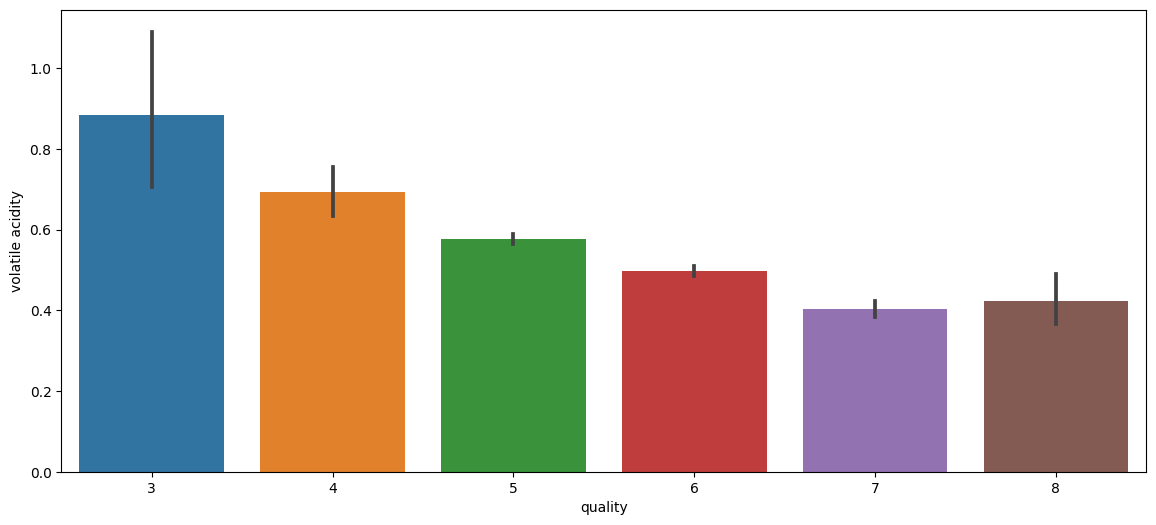

In [31]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(x='quality', y='volatile acidity', data=wine_data)

Clear relation between Volatile Acidity and Wine quality
Volatile acidity is inversely propotional to Quality

<Axes: xlabel='quality', ylabel='sulphates'>

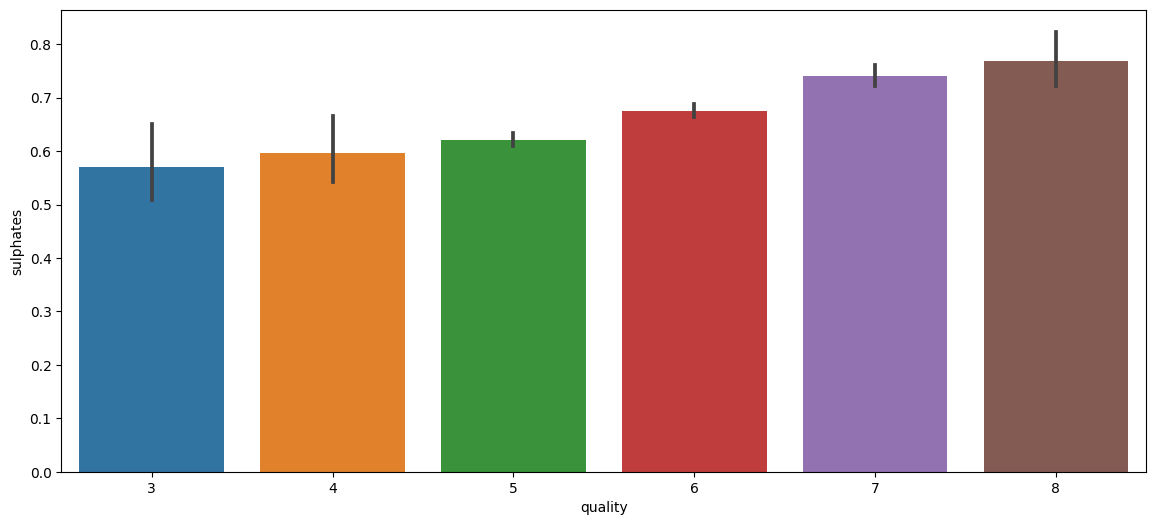

In [178]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(x='quality', y='sulphates', data=wine_data)

Clear relation between Sulphate content and Wine quality
Sulpahte content is directly propotional to Quality

<Axes: xlabel='quality', ylabel='citric acid'>

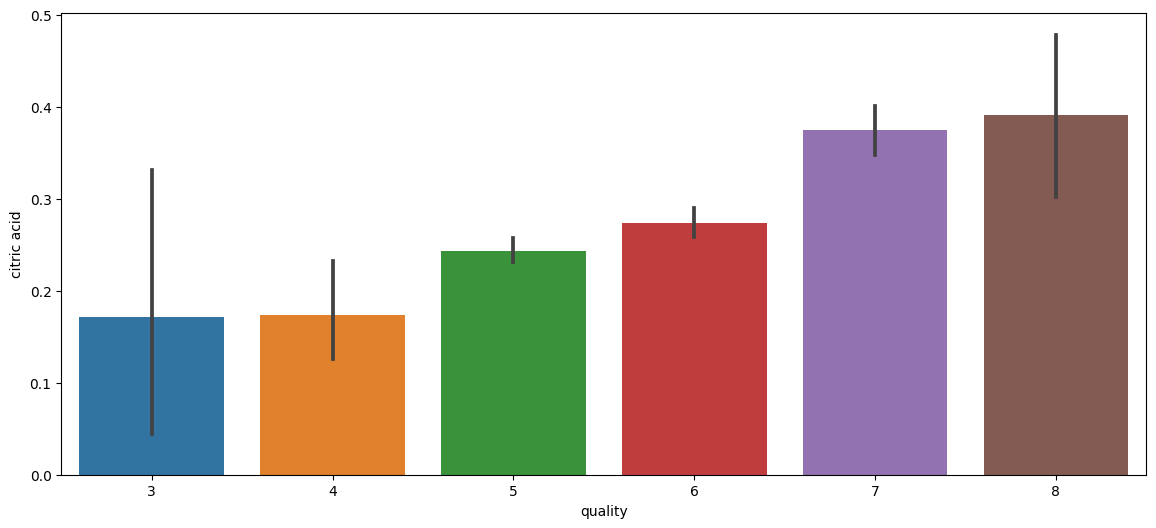

In [32]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(x='quality', y='citric acid', data=wine_data)

Clear relation between Citric Acid content and Wine quality
Citric Acid content is directly propotional to Quality

<Axes: >

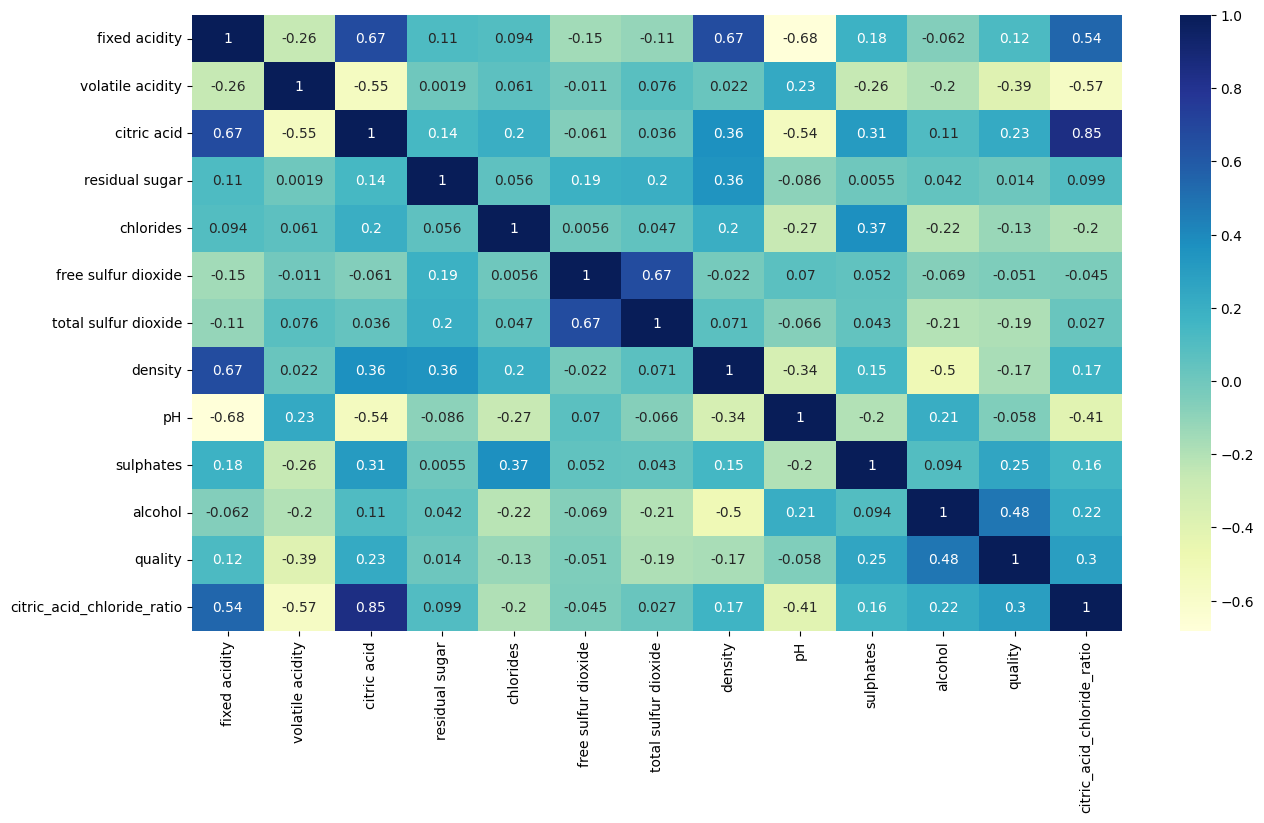

In [170]:
#The following is a Seaborn Hetmap, which illustrates the correlation amongst the data in the form a heatmap
#Respective Direct and Inverse proportions of Citric acid and Volatile Acidity with wine quality match with the previous Seaborn boxplot inferrations 
plt.figure(figsize=(15,8))
sns.heatmap(wine_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

<Axes: xlabel='quality', ylabel='sulphates'>

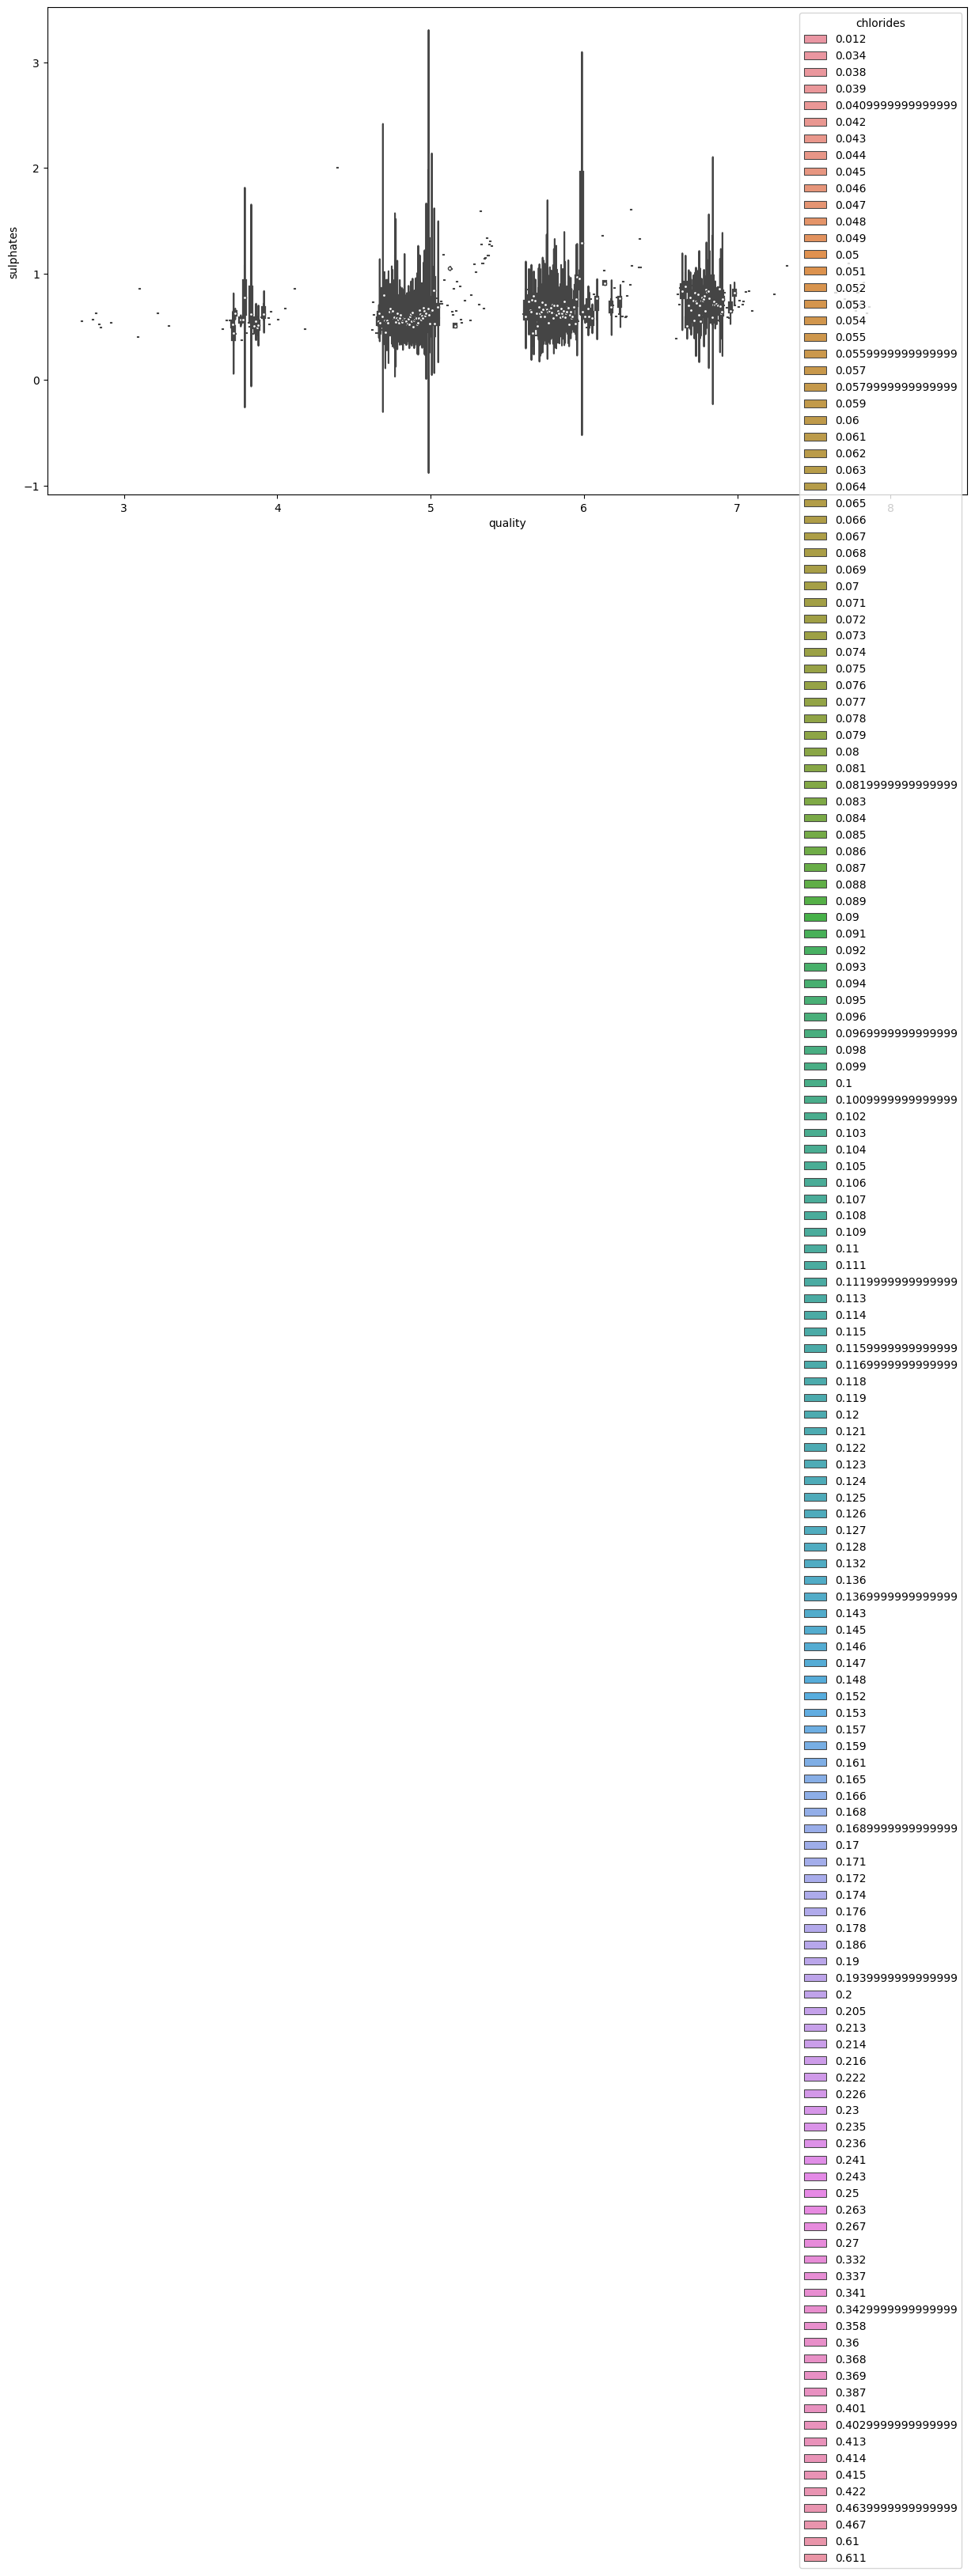

In [179]:
#Since the Sulphate content correlation with wine quality and chlorides is highest, plotting a Seaborn violin to map the Sulphate's variation with two parameters  
plt.figure(figsize=(15,8))
sns.violinplot(x ="quality", y ="sulphates", hue ="chlorides", data = wine_data)

Feature Engineering
Adding a new column 'citric_acid_chloride_ratio' to the dataset in order to boost the model's accuracy

In [112]:
wine_data['citric_acid_chloride_ratio']= wine_data['citric acid']/wine_data['chlorides']

In [125]:
#wine_data['volatility_citric_acid_ratio']= wine_data['volatile acidity']/wine_data['citric acid']

In [140]:
#wine_data=wine_data.drop(['volatility_citric_acid_ratio'], axis=1)

In [141]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,citric_acid_chloride_ratio
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.000000
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.000000
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.434783
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,7.466667
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.888889
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1.612903
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1.710526
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1.600000


Now, segregating the X and Y axes of the data
X Axis is the independent data 
Y Axis the depedent data, i.e, the one we wish to predict
In our case, the Wine quality is the dependent data

In [143]:
X= wine_data.drop(['quality'], axis=1)

In [129]:
X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,citric_acid_chloride_ratio,volatility_citric_acid_ratio
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.000000,inf
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0.000000,inf
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0.434783,19.000000
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,7.466667,0.500000
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.000000,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0.888889,7.500000
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1.612903,5.500000
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1.710526,3.923077
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1.600000,5.375000


In [144]:
Y= wine_data['quality']

In [131]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [155]:
#using test_train_split to divide the X and Y data in to training and testing data
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2)

In [146]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,citric_acid_chloride_ratio
869,7.6,0.63,0.03,2.0,0.080,27.0,43.0,0.99578,3.44,0.64,10.9,0.375000
1537,5.4,0.58,0.08,1.9,0.059,20.0,31.0,0.99484,3.50,0.64,10.2,1.355932
1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1.612903
794,10.1,0.27,0.54,2.3,0.065,7.0,26.0,0.99531,3.17,0.53,12.5,8.307692
1024,7.7,0.58,0.01,1.8,0.088,12.0,18.0,0.99568,3.32,0.56,10.5,0.113636
...,...,...,...,...,...,...,...,...,...,...,...,...
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,1.495601
380,8.3,0.26,0.42,2.0,0.080,11.0,27.0,0.99740,3.21,0.80,9.4,5.250000
1350,9.0,0.60,0.29,2.0,0.069,32.0,73.0,0.99654,3.34,0.57,10.0,4.202899
611,13.2,0.38,0.55,2.7,0.081,5.0,16.0,1.00060,2.98,0.54,9.4,6.790123


In [147]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,citric_acid_chloride_ratio
1118,7.1,0.390,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,1.846154
907,6.1,0.560,0.00,2.2,0.079,6.0,9.0,0.99480,3.59,0.54,11.5,0.000000
1281,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,2.597403
141,8.3,0.715,0.15,1.8,0.089,10.0,52.0,0.99680,3.23,0.77,9.5,1.685393
830,7.5,0.685,0.07,2.5,0.058,5.0,9.0,0.99632,3.38,0.55,10.9,1.206897
...,...,...,...,...,...,...,...,...,...,...,...,...
1386,7.4,0.640,0.07,1.8,0.100,8.0,23.0,0.99610,3.30,0.58,9.6,0.700000
803,7.7,0.560,0.08,2.5,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,0.701754
991,7.1,0.340,0.28,2.0,0.082,31.0,68.0,0.99694,3.45,0.48,9.4,3.414634
1392,7.1,0.620,0.06,1.3,0.070,5.0,12.0,0.99420,3.17,0.48,9.8,0.857143


In [148]:
Y_train

869     6
1537    6
1595    6
794     6
1024    7
       ..
19      6
380     6
1350    5
611     5
628     6
Name: quality, Length: 1119, dtype: int64

In [149]:
Y_test

1118    6
907     6
1281    6
141     5
830     4
       ..
1386    5
803     6
991     5
1392    5
1177    7
Name: quality, Length: 480, dtype: int64

In [156]:
#Placing the training data onto the linear Regressor object named 'reg'
reg.fit(X_train, Y_train)

LinearRegression()

In [157]:
#Calculating the accuracy of the Linear regessor
reg.score(X_test, Y_test)

0.33827728525661194

Only a 33% accuracy, which is clearly not sufficient

In [168]:
#Storing the predicted values into the variable 'predictions'
predictions= reg.predict(X_train) 

In [169]:
predictions

array([5.62989531, 5.71506335, 5.85362032, ..., 6.04347889, 6.45859341,
       5.22282342])

In [159]:
#Storing the predicted values into the dataframe 'FinalPredictedWineQuality'
FinalPredictedWineQuality=pd.DataFrame(predictions)

In [160]:
#printing the final values
FinalPredictedWineQuality

,0
0,5.629895
1,5.715063
2,5.853620
3,5.072283
4,6.252421
...,...
1274,6.064488
1275,6.323651
1276,6.043479
1277,6.458593


Since the Linear regressor did nto perform too well, I will predict the same values with a SVC model

In [162]:
#importing SVC model
from sklearn.svm import SVC
predictor = SVC()
predictor.fit(X_train, Y_train)

SVC()

In [163]:
predictions = predictor.predict(X_test)

In [165]:
#Calculating the accuracy of the SVC model 
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)

0.5125

51% accuracy, which is a major improvement from the linear regression

In [166]:
#printing the values
predictions

array([5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6,
       6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6,
       5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5,
       6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6,
       6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6,
       6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6,
       6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5,
       6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5,